#### Introduction
Simply put,Polynomial regression models can bend.
Similar to Linear regression, Polynomial Regression models also show the relationships between the dependent and the independent variables. Which means if independent variables go through a change, dependent variables will also go through a change and vice-versa.

This model imports data points for salaries received by various positions held. The goal of this model is to pass a curved line through those points 

####  Importing libraries

In [1]:
import pandas as pd # pandas for reading and manuplating data
import numpy as np # numpy for arithmatic operations
import matplotlib.pyplot as plt # matplotlib for visualization
import seaborn as sns # for fancy visuals
import sklearn #sklearn for building the algorithm

Most of the libraries such as pandas, numpy, matplotlib are pre installed in anacondas jupyter notebook. However, some libraries such as keras would need to be installed by typing !pip install(name of the library)

####  Reading data 

Pandas read function is one of the ways to read/import the dataset. Other ways of reading/immporting the dataset is through links or by using the inbuild dataset provided by python

In [6]:
salaries_df=pd.read_csv(r'E:\LYIT\Eoghan Furey ML\Assignment 2 Practical\2-Polynomial Regression\Position_Salaries.csv') 
#pd.read_csv will read the dataset through the path provided
# r is written at times before given the path to help pandas read the file, it may not always be necessary

salaries_df.tail(10) # .head() or .tail() will show you a part of the entire dataset
# If we do not mention how many variables you want to see, the python will by default show only 5 variables.

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Finding missing values

Most of the dataset has missing values/ NAN values, thus it is always better to check the missing values. If the missing values for a particular variable is more than 50% then that variable should be dropped.

In [7]:
salaries_df.isnull().sum() 

# .isnull function checks for the null values
# .sum displays all the null values


#It is important to check missing values because if there are a lot of missing values it can cause biaseness in model
#Following are some of the methods used by me to handle missing values:

# 1) Dropping : if the number of missing value in a particular column is more than 50% then it is advised to drop that column 
#.dropna() function can accomplish that task

#2)Replacing : Replacing missing values with the values of mean, median or mode is another way of hanling missing values.
#fillna() function of pandas is used to replace the missing values

Position    0
Level       0
Salary      0
dtype: int64

Columns Position,Level and Salary didn't have any missing values.Thus, there was no need to use either dropping or replacing function

#### Checking the shape, size, correlation, description and the info of the dataset

This step is only carried out to understand the dataset. Commonly used method for understanding the dataset is to find out the shape,discription, info,correlation of the data set, it is done so that we know how many rows, columns, correlation, min, maximum values are there.

In [8]:
salaries_df.describe() #it will tell us whats the mean, standard deviation and the maximum values along with the total counts

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [9]:
salaries_df.info() # .info will tell us what type of data we have i.e whether it is numerical, cateogrical, float etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


It is important to check the correlation between dependent and independent variables because that tells us about the strength of the relationship between dependent variables and independent variables.

In [10]:
salaries_df.corr() #.corr will give us a correlation amoung the variables

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


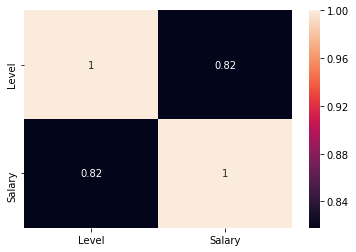

In [11]:
#checking the corelation with heat map
correlation=salaries_df.corr()
sns.heatmap(correlation,annot=True) #without annot=True no values will be displayed in the heatmap

#### Checking the normality of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7AF057320>,
      dtype=object)

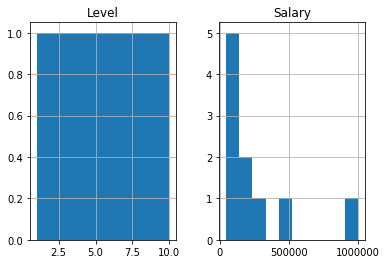

In [5]:
#checking normality by plotting a simple histogram

salaries_df.hist()

The dataset is not normal as the values in this particular dataset are unique. A normal dataset would have a bell shaped curved.
Most common methods to check normality are:

1)Shapiro-Wilk : This method assumes that the dataset is normal if the p value is less than 0.5, also this method can only be used if the dataset is less than or equal to 5000

2)QQ Plot/ Quantile-Quantile plot

#### Splitting the dataset to X and Y variable

Did not split the dataset into training and testing because I just wanted to see how the model would fit on the entire dataset



In [14]:
X=salaries_df.iloc[:,1:2] # Values of first two columns are assigned to the X variable
y=salaries_df.iloc[:,2] # Values of the last column has been assigned to the Y variable

# Iloc is used to get particular rows and columns
print(X)
print(y)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64


#### Creating a linear Regression model

In [15]:
from sklearn.linear_model import LinearRegression  # linear_model from scikit learn is the only way to import the LinearRegression Algorithm

reg=LinearRegression() #for convinenece of making the code easy to write the variable reg is used to initiate LinearRegression

reg.fit(X,y)#using the fit function to add values into the regression algorithm.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score of the regression model

In [16]:
print(reg.score(X,y))

0.6690412331929895


#### Fittinng Polynomial regression 

In [17]:
from sklearn.preprocessing import PolynomialFeatures # from sklearns preprocessing importing Poylynomial features
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Visualizing linear regression result

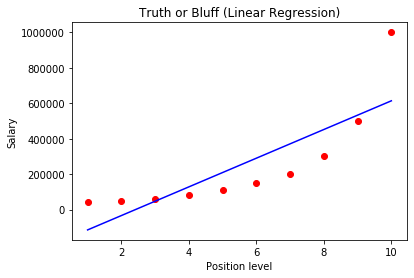

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Polynomial Regression results

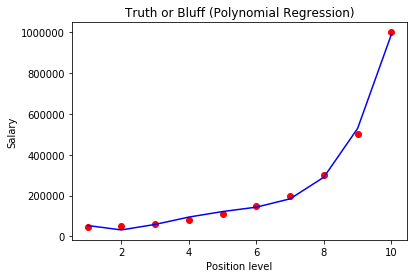

In [13]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#### Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [22]:
# Predicting a new result with Linear Regression
reg.predict([[6.5]])

array([330378.78787879])

In [24]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265153])

#### Conclusion

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. For this reason, polynomial regression is considered to be a special case of multiple linear regression.